# ChebLieNet: visualizing the Fourier modes (eigenspaces) of Lie groups


In this tutorial, we introduce the notion of group manifold graph eigenspace. It is defined as the eigen decomposition of the symmetric normalized graph laplacian. The eigenvalues have to be interpreted as graph frequencies.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import numpy as np
import torch

from cheblienet.graphs.graphs import SE2GEGraph, SO3GEGraph, S2GEGraph, R2GEGraph

In [2]:
def plot_eigenvalues(graph, indices):
    
    eigenval, _ = graph.get_eigen_space()
    
    fig = plt.figure()
    
    plt.scatter(indices, eigenval[indices], c="firebrick")
        
    plt.xlabel(r"$k$")
    plt.ylabel(r"$\lambda_k$")
    
    fig.tight_layout()

def plot_eigenspace(graph, indices, size):
    M, L = size
    K = len(indices)

    _, eigenvec = graph.get_eigen_space()
    eigenvec[:, 0] = 0
        
    fig = plt.figure(figsize=(3*K, 3*L))
    
    X, Y, Z = graph.cartesian_pos()
    
    for l in range(L):
        for k in range(K):
            ax = fig.add_subplot(L, K, l * K + k + 1)
            ax.scatter(X[l*M:(l+1)*M], Y[l*M:(l+1)*M], c=eigenvec[l*M:(l+1)*M, indices[k]], cmap=cm.RdBu)
            ax.axis("off")
            
    fig.tight_layout()

## Get the eigen space

In [3]:
s2_graph = S2GEGraph(
    size=[642, 1],
    K=8,
    sigmas=(1., 1., 1.),
    path_to_graph="saved_graphs"
)

Graph does not already exist: INITIALIZATION...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 642/642 [00:01<00:00, 628.65it/s]
Done!
Saved!


In [4]:
eigen_values, eigen_vectors = s2_graph.get_eigen_space()

In [5]:
eigen_values.min(), eigen_values.max()

(tensor(-1.3904e-07), tensor(1.4984))

## Visualize the eigen space

### Translation group $\mathbb{R}^2$

In [6]:
r2_graph = R2GEGraph(
    [28,28, 1],
    K=8,
    sigmas=(1., 1., 1.),
    path_to_graph="saved_graphs"
)

Graph does not already exist: INITIALIZATION...
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 784/784 [00:00<00:00, 1548.36it/s]
Done!
Saved!


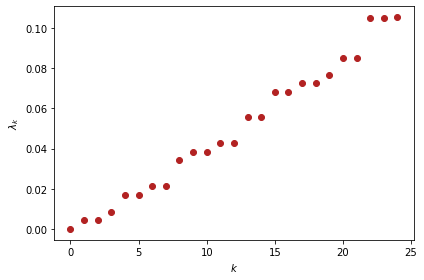

In [7]:
plot_eigenvalues(r2_graph, np.arange(25))

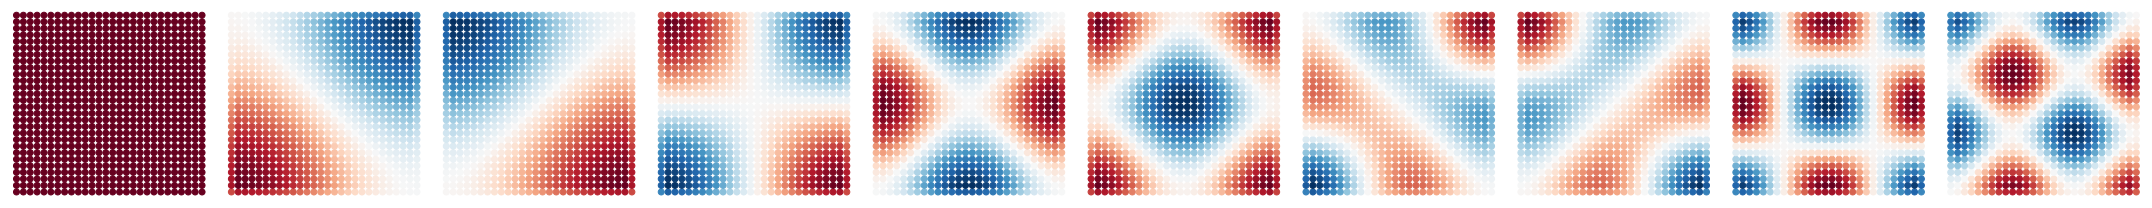

In [8]:
plot_eigenspace(r2_graph, torch.arange(10), (784, 1))

### Roto-translation group $SE(2)$

In [9]:
se2_graph = SE2GEGraph(
    [28,28, 6],
    K=16,
    sigmas=(1., 0.1, 0.0026),
    path_to_graph="saved_graphs"
)

Graph does not already exist: INITIALIZATION...
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4704/4704 [00:20<00:00, 227.02it/s]
Done!
Saved!


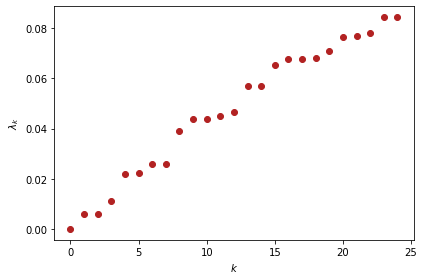

In [10]:
plot_eigenvalues(se2_graph, np.arange(25))

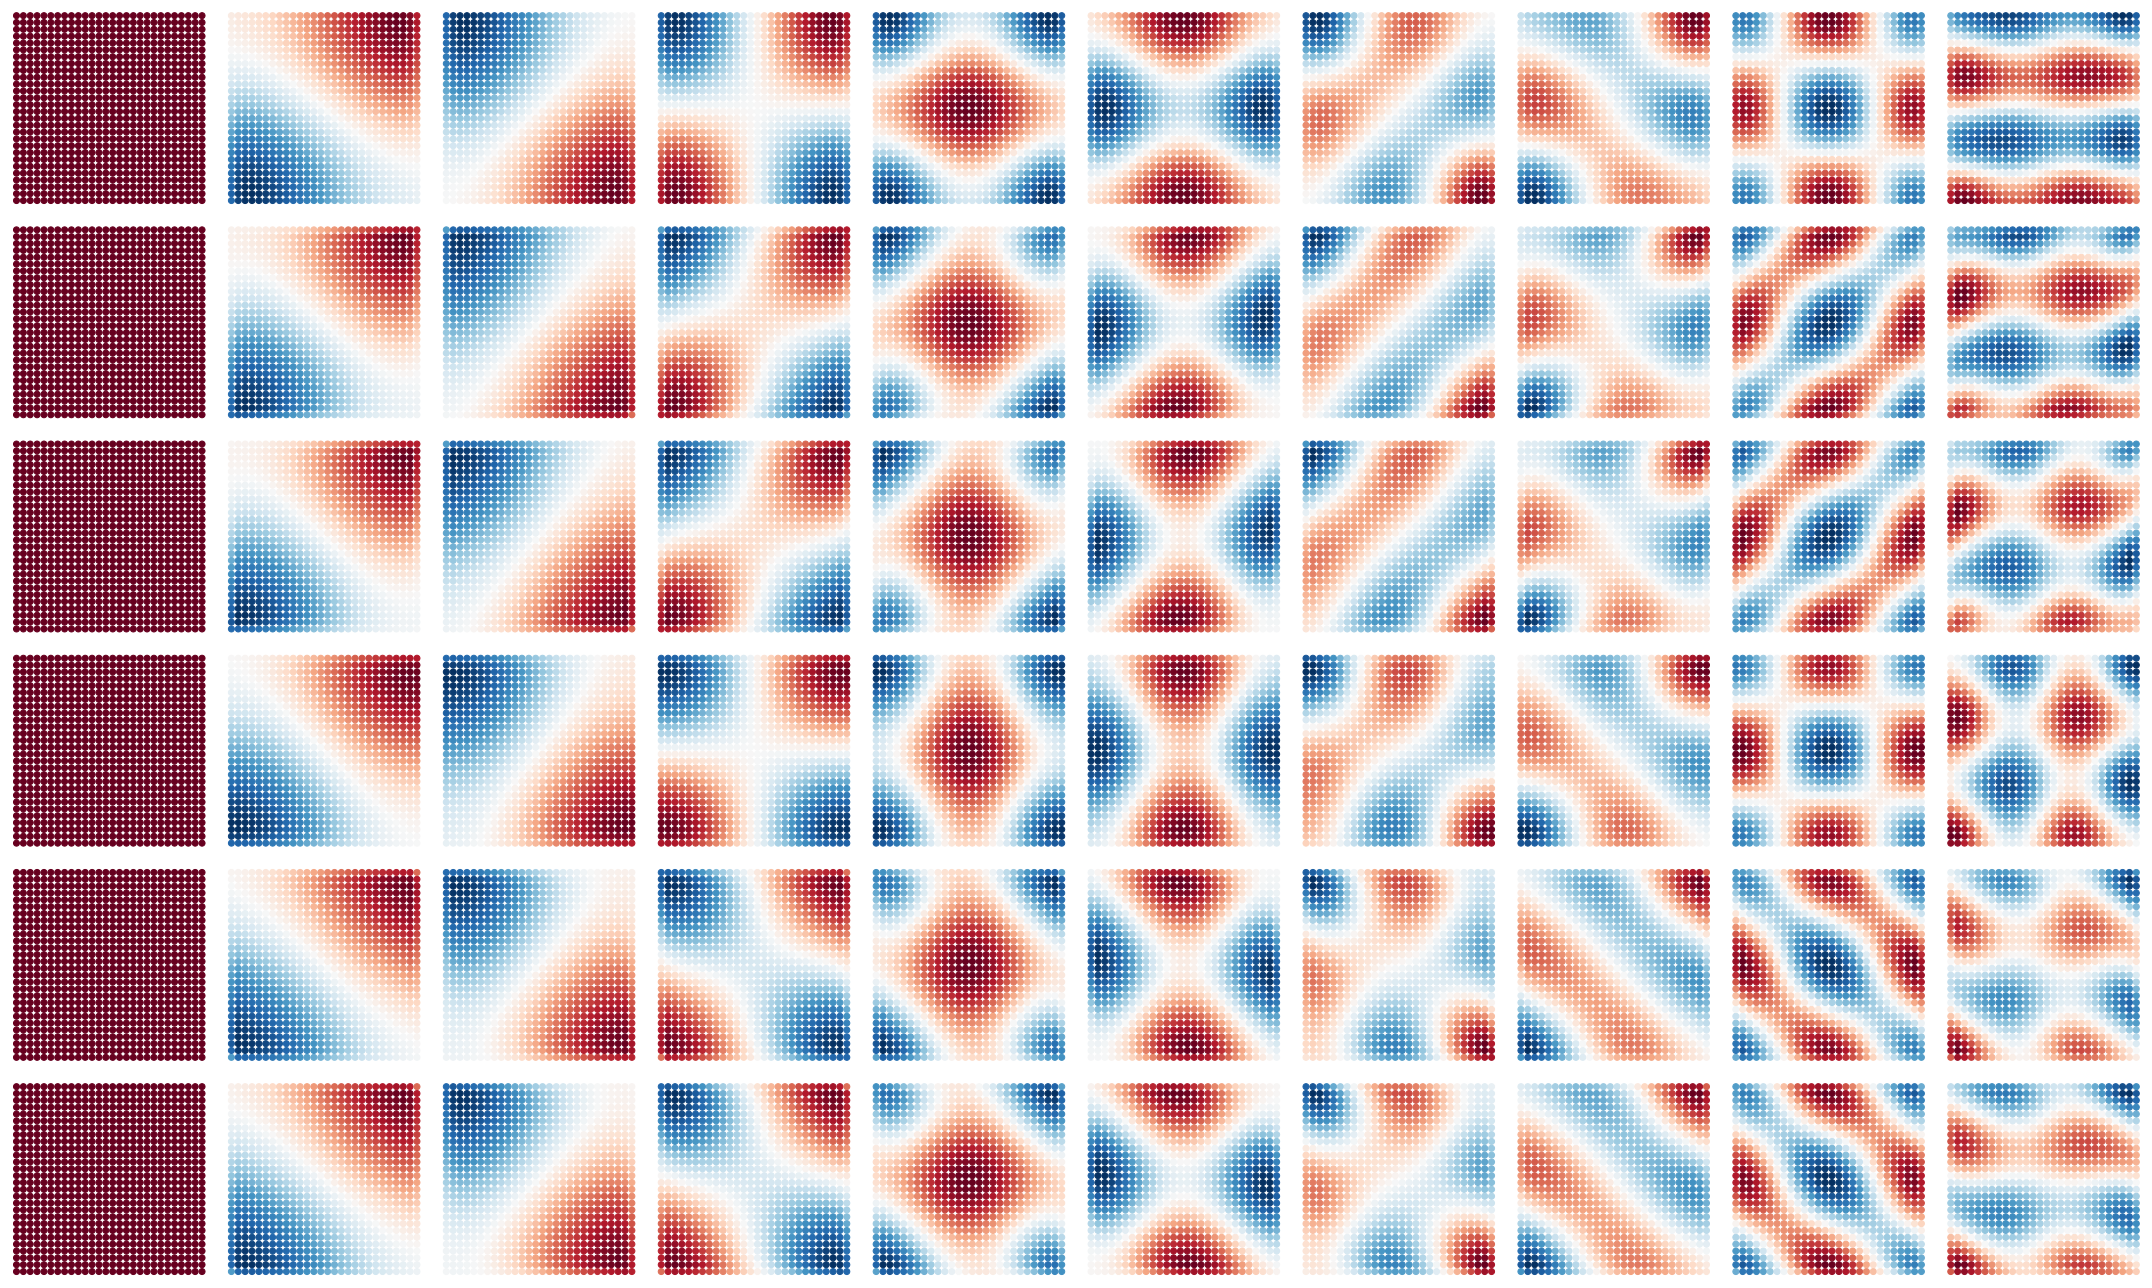

In [11]:
plot_eigenspace(se2_graph, torch.arange(10), (784, 6))

### 1-sphere $S(2)$

In [12]:
s2_graph = S2GEGraph(
    size=[642, 1],
    K=8,
    sigmas=[1., 1., 1.],
    path_to_graph="saved_graphs"
)

Graph does not already exist: INITIALIZATION...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 642/642 [00:01<00:00, 620.94it/s]
Done!
Saved!


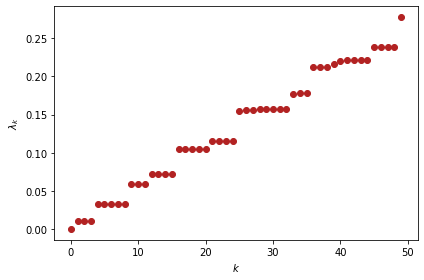

In [13]:
plot_eigenvalues(s2_graph, np.arange(50))

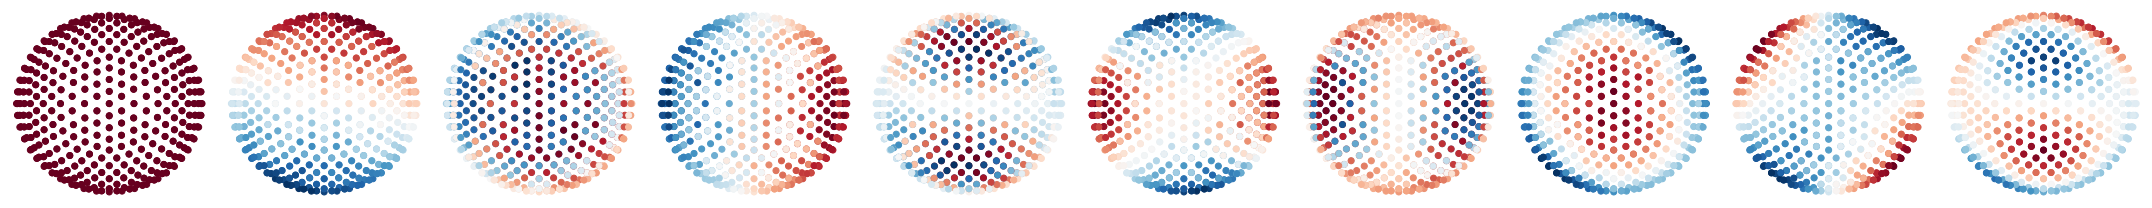

In [14]:
plot_eigenspace(s2_graph, torch.arange(10), (642, 1))

### 3-d rotation group $SO(3)$

In [15]:
so3_graph = SO3GEGraph(
    size=[642, 6],
    K=16,
    sigmas=(1., .1, 10.0 / 642),
    path_to_graph="saved_graphs"
)

Graph does not already exist: INITIALIZATION...
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3852/3852 [00:31<00:00, 122.77it/s]
Done!
Saved!


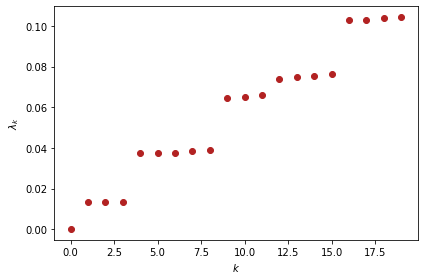

In [16]:
plot_eigenvalues(so3_graph, np.arange(20))

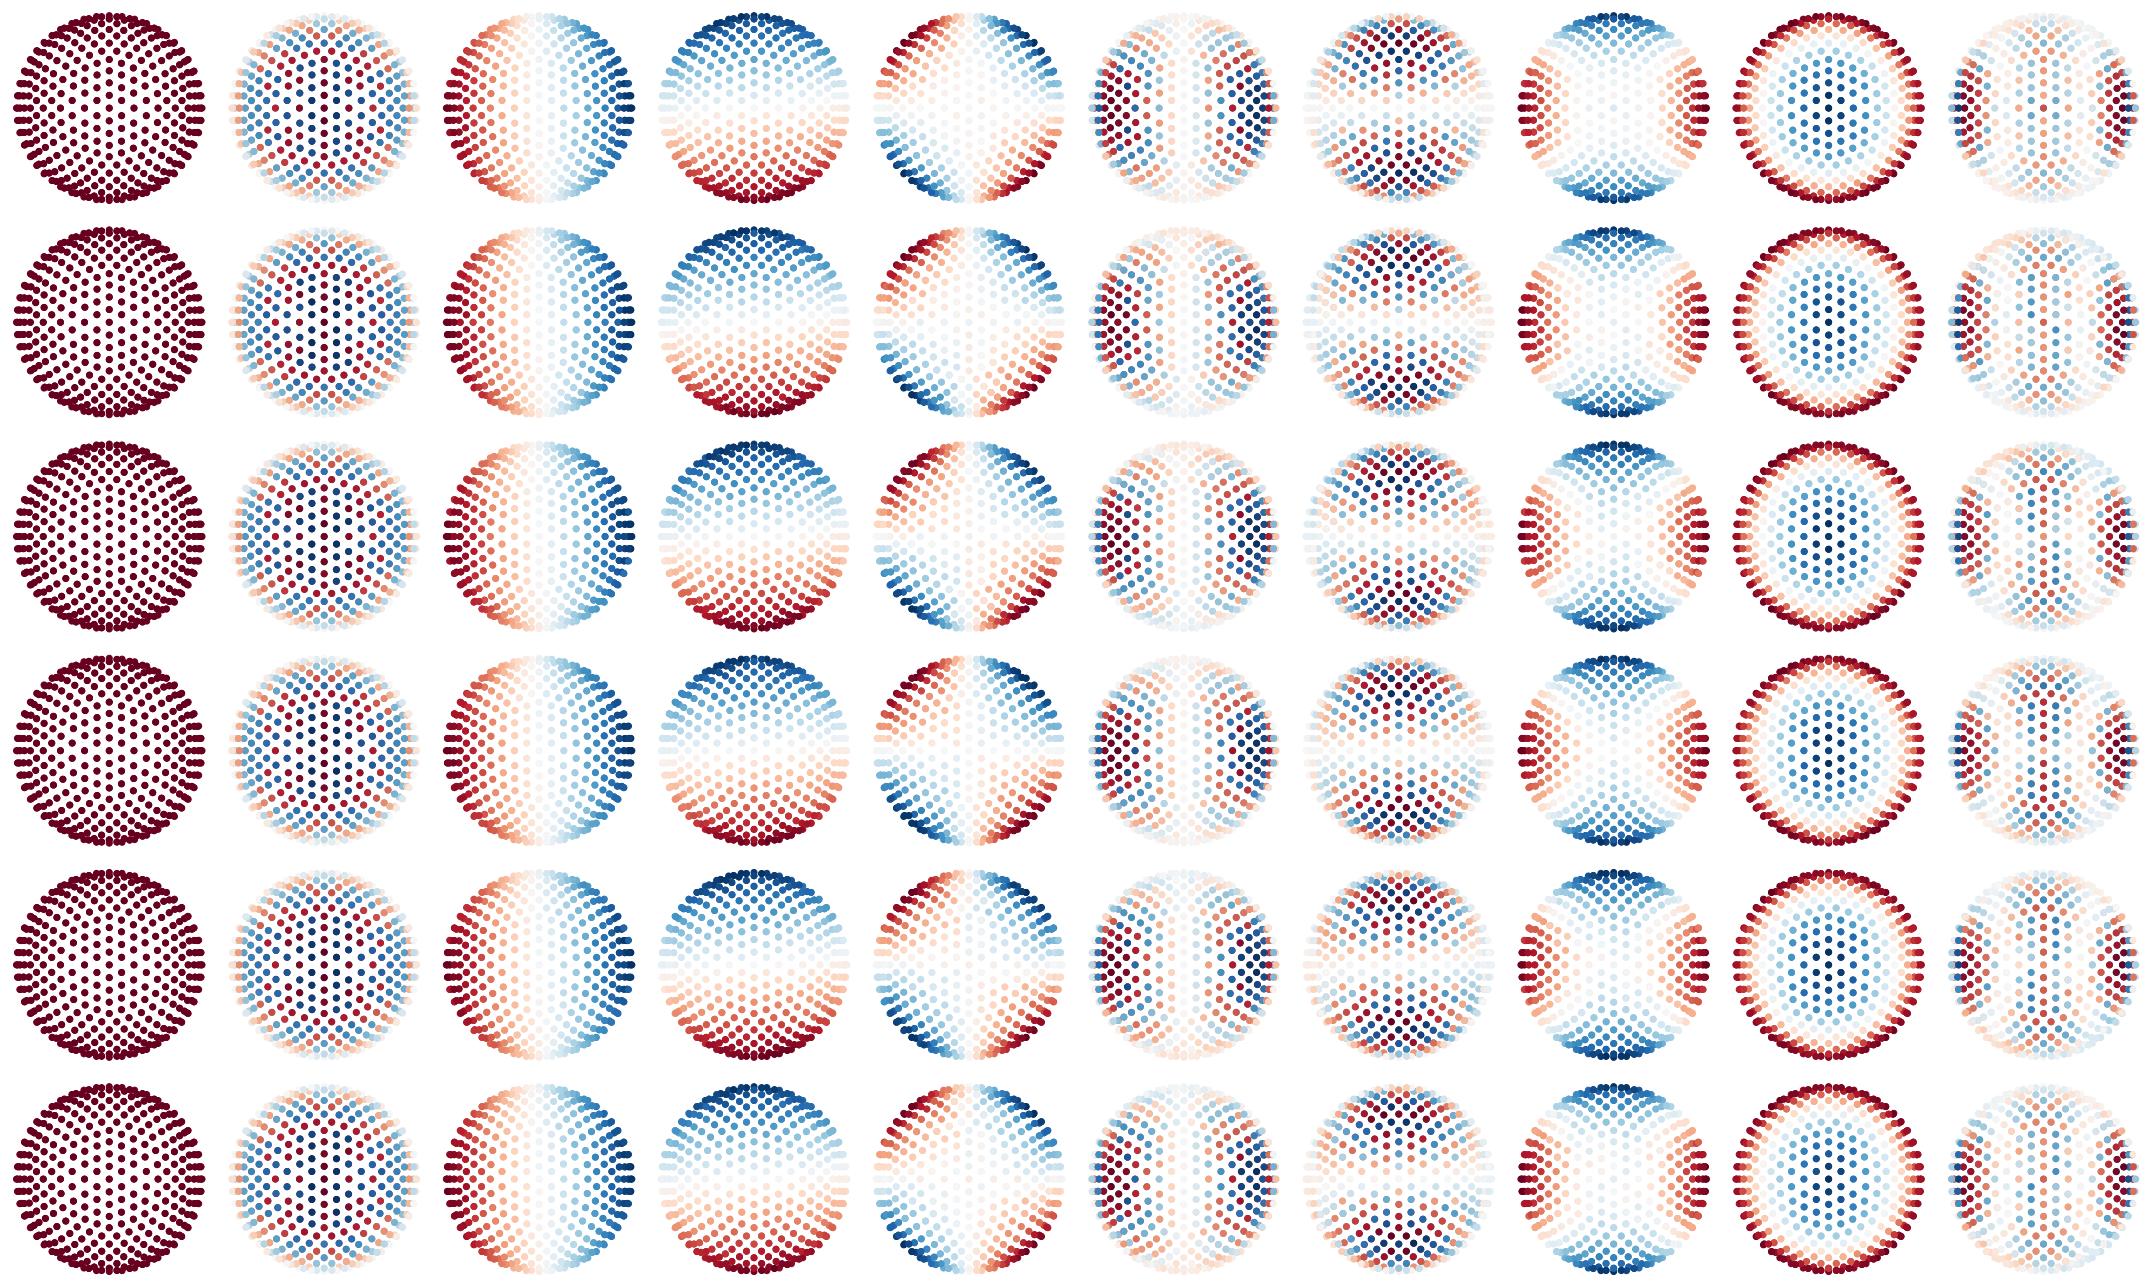

In [17]:
plot_eigenspace(so3_graph, torch.arange(10), (642, 6))